# Simulation des logistischen Wachstums

In [1]:
#!pip install ipynb

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from ipynb.fs.full.numode import EulerStep

Simulation des logistischen Wachstums durch eine einfache Schleife über die Zeitschritte:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def SimulateLogisticGrowth(method = EulerStep, k=0.8, K=10, start_t=0, start_y0=0.1, dt=2):
    grid_xy = np.meshgrid(np.linspace(-1,11,13),np.linspace(-1,11,13))
    u = 1
    v = k*grid_xy[1] * (1-grid_xy[1]/K)
    plt.quiver(*grid_xy,u,v)
    plt.axis('scaled')
    plt.xlabel('t')
    plt.ylabel('y')
    t = start_t
    y = start_y0
    t_values = [t]
    y_values = [y]
    def f(t,y):
        return k*y*(1-y/K)
    while t < 32+1e-12:
        y = method(f, t, y, dt)
        #y = method(lambda t,y: k*y*(1-y/K), t, y, dt)
        #y = EulerStep(f,t,y,dt)
        #y = y + dt * f(t,y)
        t += dt
        t_values.append(t)
        y_values.append(y)
    plt.plot(t_values,y_values,"-o")
    t_ex = np.linspace(start_t,12,20*(10-start_t)+1,endpoint=True)
    y_ex = K / (1 +  (K/start_y0-1)*np.exp(-k*(t_ex-start_t)))
    plt.plot(t_ex,y_ex)
    plt.show()

Numerische Lösungen für verschiedene Anfangswerte

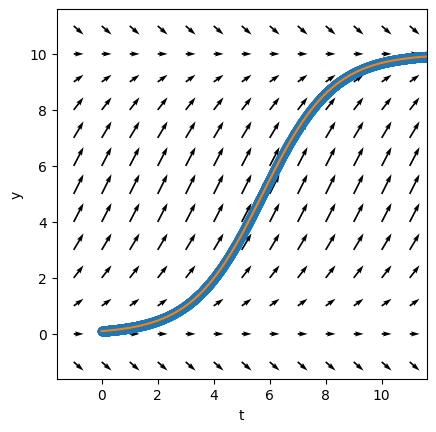

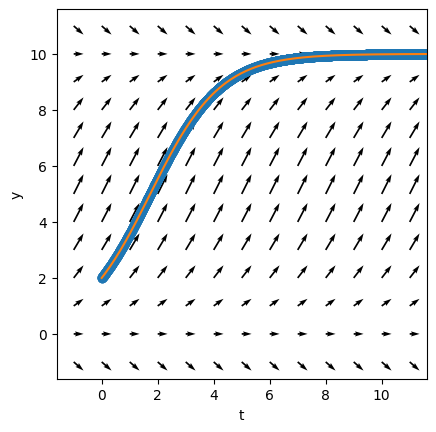

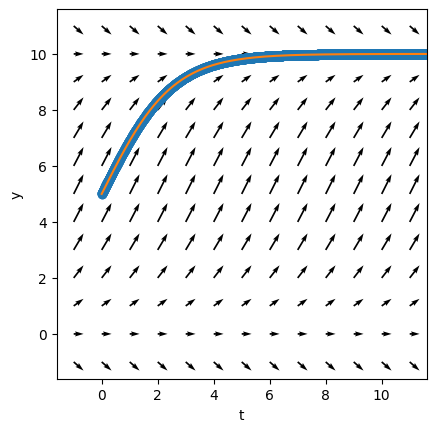

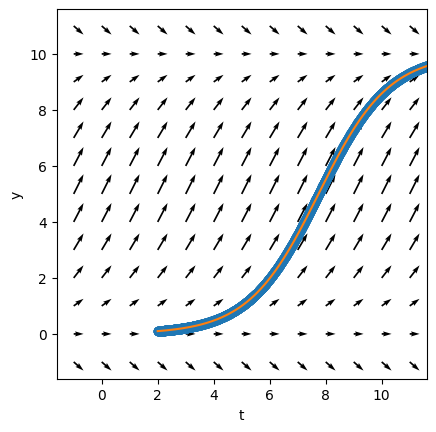

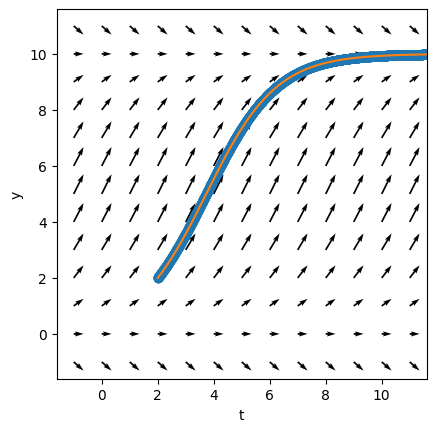

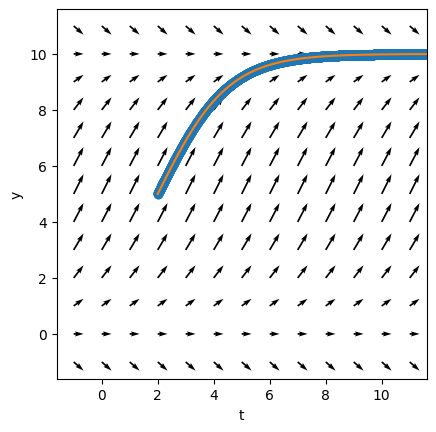

In [4]:
for start_t in [0,2]:
    for start_y0 in [0.1,2,5]:
        SimulateLogisticGrowth(method=EulerStep, start_t=start_t, start_y0=start_y0, dt=0.005)

Nächster Halt: 
* Verbesserte Methoden durch bessere Richtungsschätzungen
* Kombiniere mehrere Richtungen, um eine bessere Approximation zu erhalten
* $\leadsto$ [Numerische DGLs II](numode2.ipynb)